In [10]:
!python spacetimeformer/train.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 256 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 60 --target_points 10 --epochs 200 --gpus 0 --activation gelu --dropout_emb 0.15 --dropout_qkv 0.15 --dropout_ff 0.15 --dropout_attn_out 0.15 --dropout_attn_matrix 0.15 --learning_rate 1e-5 --enc_layers 3 --dec_layers 4 --loss mse --n_heads 4 --d_model 512 --d_ff 2048


Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): FullAttention(
    (dropout): Dropout(p=0.15, inplace=False)
  )
  (query_projection): Linear(in_features=512, out_features=800, bias=True)
  (key_projection): Linear(in_features=512, out_features=800, bias=True)
  (value_projection): Linear(in_features=512, out_features=800, bias=True)
  (out_projection): Linear(in_features=800, out_features=512, bias=True)
  (dropout_qkv): Dropout(p=0.15, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): FullAttention(
    (dropout): Dropout(p=0.15, inplace=False)
  )
  (query_projection): Linear(in_features=512, out_features=800, bias=True)
  (key_projection): Linear(in_features=512, out_features=800, bias=True)
  (value_projection): Linear(in_features=512, out_features=800, bias=True)
  (out_projection): Linear(in_features=800, out_features=512, bias=True)
  (dropout_qkv)

In [66]:
# !python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 64 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 100 --target_points 10 --epochs 200 --activation gelu --dropout_emb 0.3 --dropout_qkv 0.3 --dropout_ff 0.3 --dropout_attn_out 0.3 --dropout_attn_matrix 0.3 --learning_rate 1e-5 --enc_layers 5 --dec_layers 6 --loss mse --n_heads 6 --d_model 512 --d_ff 2048

# most recent (Ran on Feb 14th)
# !python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 256 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 60 --target_points 10 --epochs 200 --gpus 0 --activation gelu --dropout_emb 0.15 --dropout_qkv 0.15 --dropout_ff 0.15 --dropout_attn_out 0.15 --dropout_attn_matrix 0.15 --learning_rate 5e-6 --enc_layers 4 --dec_layers 5 --loss mse --n_heads 4 --d_model 256 --d_ff 1024
# !python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 64 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 120 --target_points 20 --epochs 200 --activation gelu --dropout_emb 0.3 --dropout_qkv 0.3 --dropout_ff 0.3 --dropout_attn_out 0.3 --dropout_attn_matrix 0.3 --learning_rate 5e-6 --enc_layers 5 --dec_layers 6 --loss mse --n_heads 5 --d_model 400 --d_ff 1600

!python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 256 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 100 --target_points 10 --epochs 200 --activation gelu --dropout_emb 0.3 --dropout_qkv 0.3 --dropout_ff 0.3 --dropout_attn_out 0.3 --dropout_attn_matrix 0.3 --learning_rate 1e-5 --enc_layers 5 --dec_layers 6 --loss mse --n_heads 4 --d_model 512 --d_ff 2096

Traceback (most recent call last):
  File "spacetimeformer/pred_fromfile.py", line 440, in <module>
    main(args)
  File "spacetimeformer/pred_fromfile.py", line 352, in main
    dataset = TimeSeriesDataset_ContextOnly(folder_name=folder, file_name=i, context_length=args.context_points)
  File "/Users/alecjeffery/Documents/Playgrounds/Python/spacetimeformer_stocks/spacetimeformer/TimeSeriesDataset_ContextOnly.py", line 10, in __init__
    self.data_file = self.load_csv_file(folder_name, file_name)
  File "/Users/alecjeffery/Documents/Playgrounds/Python/spacetimeformer_stocks/spacetimeformer/TimeSeriesDataset_ContextOnly.py", line 15, in load_csv_file
    return pd.read_csv(file_path, index_col=0).values  # Treat the first column as index
  File "/Users/alecjeffery/anaconda3/envs/spacetimeformer/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/Users/alecjeffery/anaconda3/envs/spacetimeformer/lib/python3

In [36]:
a['Price_PrctDelta'].sort_values()

LLY    -3.866980
AMD    -3.554501
AVGO   -3.388530
COST   -3.190850
NFLX   -3.037027
          ...   
BA      2.538764
HUM     4.285608
ADBE    4.742271
WBA     5.448320
ADM     6.706529
Name: Price_PrctDelta, Length: 61, dtype: float64

In [65]:
#%%

import pandas as pd

a = pd.read_csv('oos_predictions.csv', index_col=0)
b = pd.read_csv('TixMuSig.csv',index_col=1)


#%%

b
# b.loc['AAPL']

#%%

col = ['Close_'+str(i) for i in range(1,11)]
Vcol = ['Volatility_'+str(i) for i in range(1,11)]
print(col)
for i in a.index:
    a.loc[i][col] = a.loc[i][col]*b.loc[i].closesig + b.loc[i].closemu
    a.loc[i][Vcol] = a.loc[i][Vcol]*b.loc[i].volsig + b.loc[i].volmu

#%%

a['Price_PrctDelta'] = 100*(a['Close_10']-a['Close_1'])/a['Close_1']
a['Volatility_PrctDelta'] = 100*(a['Volatility_10']-a['Volatility_1'])/a['Volatility_1']

#%%

PossibleLongCalls = a[(a['Price_PrctDelta'] > 0) & (a['Volatility_PrctDelta'] > 0)]
PossibleLongPuts = a[(a['Price_PrctDelta'] < 0) & (a['Volatility_PrctDelta'] > 0)]

PossibleLongs = a[(a['Price_PrctDelta'] > 0)]
PossibleShorts = a[(a['Price_PrctDelta'] < 0)]

VolPump = a[(a['Volatility_PrctDelta'] > 0)]
VolDump = a[(a['Volatility_PrctDelta'] < 0)]

#%%

Calls=PossibleLongCalls[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=False)
Puts=PossibleLongPuts[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=True)
Longs=PossibleLongs[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=False)
Shorts=PossibleShorts[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=True)

LongVol=VolPump[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Volatility_PrctDelta',ascending=False)
ShortVol=VolDump[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Volatility_PrctDelta',ascending=True)


print('Long: ',Longs[Longs['Price_PrctDelta']>2].Price_PrctDelta)
print('Short: ',Shorts[Shorts['Price_PrctDelta']<-2].Price_PrctDelta)

print('Long Calls: ',Calls[ (Calls['Price_PrctDelta']>2) &(Calls['Volatility_PrctDelta']>5)].index.values)
print('Long Puts: ',Puts[ (Puts['Price_PrctDelta']<-2) & (Puts['Volatility_PrctDelta']>5)].index.values)

print('Long Volatility: ',LongVol[LongVol.Volatility_PrctDelta > 20].index.values)
print('Short Volatility: ',ShortVol[ShortVol.Volatility_PrctDelta < -20].Volatility_PrctDelta)


print('Long Butterfly: ',Calls[ (Calls['Price_PrctDelta']<5) &(Calls['Volatility_PrctDelta']>10)].index.values)
print('Short Butterfly: ',VolDump[ (VolDump['Price_PrctDelta']<5) &(Calls['Volatility_PrctDelta']>10)].index.values)

['Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Close_6', 'Close_7', 'Close_8', 'Close_9', 'Close_10']
Long:  ADM     6.706529
WBA     5.448320
ADBE    4.742271
HUM     4.285608
BA      2.538764
PFE     2.012513
Name: Price_PrctDelta, dtype: float64
Short:  LLY     -3.866980
AMD     -3.554501
AVGO    -3.388530
COST    -3.190850
NFLX    -3.037027
GE      -2.782415
NVDA    -2.700282
PSX     -2.231674
IBM     -2.203518
BRK B   -2.055191
Name: Price_PrctDelta, dtype: float64
Long Calls:  ['WBA']
Long Puts:  ['NFLX' 'GE' 'IBM']
Long Volatility:  []
Short Volatility:  KR     -29.104078
CRM    -25.875633
DELL   -23.953060
AVGO   -23.642013
ADBE   -23.138820
Name: Volatility_PrctDelta, dtype: float64
Long Butterfly:  ['MMM' 'ABEV']
Short Butterfly:  []


/var/folders/mt/d3dxxncs4zbfjzd090b9rhph0000gn/T/ipykernel_65492/2365692489.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Short Butterfly: ',VolDump[ (VolDump['Price_PrctDelta']<5) &(Calls['Volatility_PrctDelta']>10)].index.values)


0.28321575408902705

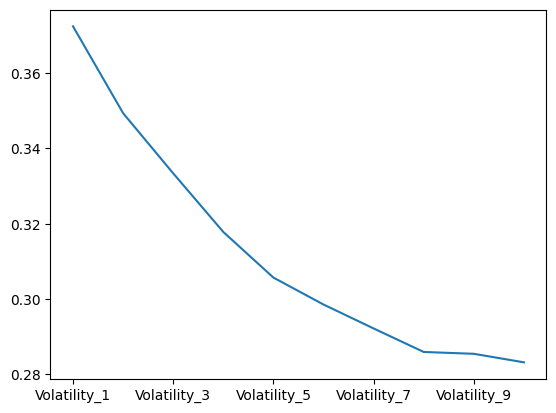

In [64]:
a.loc['DELL'][Vcol].plot()
a.loc['DELL']['Volatility_10']